In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random 
import pandas as pd
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
train = pd.read_csv('/drive/My Drive/Colab Notebooks/PR_lab_Assignments/Assignment2/train-perceptron.txt',sep=' ', header = None)
train

,0,1,2
0,1,1.0,1
1,1,-1.0,1
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2
5,4,5.0,1


In [ ]:
class1 = []
class2 = []

Plotting training samples

In [ ]:
for i in range(len(train)):
  if(train[2][i] == 1):
    class1.append([train[0][i],train[1][i]])
  else:
    class2.append([train[0][i],train[1][i]])

In [ ]:
print(class1)
print(class2)

[[1, 1.0], [1, -1.0], [4, 5.0]]
[[2, 2.5], [0, 2.0], [2, 3.0]]


In [ ]:
class1_x = []
class1_y = []
for i in range(len(class1)):
  class1_x.append(class1[i][0])
  class1_y.append(class1[i][1])
class1_x

[1, 1, 4]

In [ ]:
class2_x = []
class2_y = []
for i in range(len(class2)):
  class2_x.append(class2[i][0])
  class2_y.append(class2[i][1])
class2_x

[2, 0, 2]

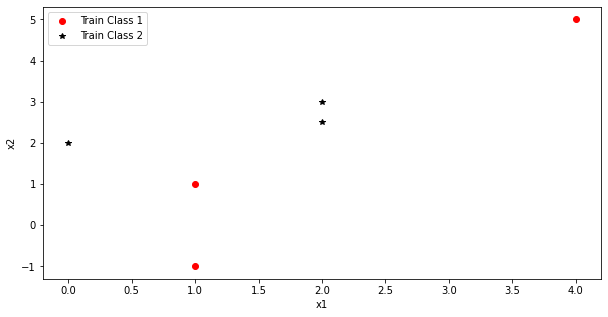

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(class1_x,class1_y,'or' , label = 'Train Class 1')
plt.plot(class2_x,class2_y,'*k' , label = 'Train Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

Phi function

In [ ]:
y_class1 = []
for i in range(len(class1)):
  y_class1.append([(class1[i][0]*class1[i][0]) , (class1[i][1]*class1[i][1]) , (class1[i][0]*class1[i][1]) , class1[i][0] , class1[i][1] , 1])

print(y_class1)

[[1, 1.0, 1.0, 1, 1.0, 1], [1, 1.0, -1.0, 1, -1.0, 1], [16, 25.0, 20.0, 4, 5.0, 1]]


In [ ]:
y_class2 = []
for i in range(len(class2)):
  y_class2.append([-(class2[i][0]*class2[i][0]) , -(class2[i][1]*class2[i][1]) , -(class2[i][0]*class2[i][1]) , -class2[i][0] , -class2[i][1] , -1])

print(y_class2)

[[-4, -6.25, -5.0, -2, -2.5, -1], [0, -4.0, -0.0, 0, -2.0, -1], [-4, -9.0, -6.0, -2, -3.0, -1]]


In [ ]:
y = []
y.extend(y_class1)
y.extend(y_class2)
y

[[1, 1.0, 1.0, 1, 1.0, 1],
 [1, 1.0, -1.0, 1, -1.0, 1],
 [16, 25.0, 20.0, 4, 5.0, 1],
 [-4, -6.25, -5.0, -2, -2.5, -1],
 [0, -4.0, -0.0, 0, -2.0, -1],
 [-4, -9.0, -6.0, -2, -3.0, -1]]

### Many At a Time

In [ ]:
def many_at_a_time(learning_rate,w):
  all_correct = False
  iter = 0
  y_sum = np.zeros(6)
  w_new = np.zeros(6)
  while (not all_correct and iter <= 200):
      mc = 0
      y_sum = np.zeros(6)
      for i in range(len(y)):
        #print('wTy: ',np.dot((np.transpose(w)),y[i]))
        if (np.dot((np.transpose(w)),y[i])) <= 0:
              y_sum = np.add(y_sum , y[i])
              mc +=1
      if mc == 0:
        all_correct = True
      else:        
        all_correct = False
        w = w + np.dot(learning_rate , y_sum)
      iter += 1
      

  return w,iter


### One at a time

In [ ]:
def one_at_a_time(learning_rate,w):
  all_correct = False
  iter = 0
  y_sum = np.zeros(6)
  w_new = np.zeros(6)
  while (not all_correct and iter <= 200):
      mc = 0
      for i in range(len(y)):
        #print('wTy: ',np.dot((np.transpose(w)),y[i]))
        if (np.dot((np.transpose(w)),y[i])) <= 0:
              w = w + np.dot(learning_rate,y[i])
              mc +=1
      if mc == 0:
        all_correct = True
      else:        
        all_correct = False
      iter += 1
      

  return w,iter


In [ ]:
one_time_iter = []
one_time_weight = []
many_time_iter = []
many_time_weight = []

### Initial weight all ones

In [ ]:
one_time_iter = []
one_time_weight = []
many_time_iter = []
many_time_weight = []
lr = np.arange(0.1,1.1,0.1)
w1 = np.ones(6)
for i in lr:
  
  w_m,iter_m = many_at_a_time(i,w1)
  many_time_iter.append(iter_m)
  many_time_weight.append(w_m)
  
  w_o,iter_o = one_at_a_time(i,w1)
  one_time_iter.append(iter_o)
  one_time_weight.append(w_o)

print('MANY TIME Iteration:', many_time_iter)
print('MANY TIME WEIGHT: ', many_time_weight)
print('ONE TIME Iteration:', one_time_iter)
print('ONE TIME WEIGHT: ', one_time_weight)


#  print('Learning rate: ', i)
#  print('Weights: ',w)
# print('No of iterations: ', iter)

MANY TIME Iteration: [102, 104, 91, 116, 105, 114, 91, 91, 105, 93]
MANY TIME WEIGHT:  [array([ 6.5  , -4.425,  2.8  , -0.5  , -5.45 ,  1.2  ]), array([ 13.  ,  -8.85,   5.6 ,  -1.  , -10.9 ,   2.4 ]), array([ 17.8  , -11.825,   7.9  ,  -1.4  , -15.05 ,   2.8  ]), array([ 26.6, -18. ,  11.4,  -2.2, -22.6,   5.4]), array([ 32.5  , -22.125,  14.   ,  -2.5  , -27.25 ,   6.   ]), array([ 40. , -26.9,  17.2,  -3.2, -33.8,   8.2]), array([ 41.6  , -27.525,  18.5  ,  -3.2  , -35.05 ,   6.6  ]), array([ 47.4, -31.6,  21. ,  -3.8, -40.2,   7.4]), array([ 57.7 , -38.15,  25.3 ,  -5.3 , -49.4 ,  10.  ]), array([ 60.  , -38.75,  25.  ,  -4.  , -51.5 ,  10.  ])]
ONE TIME Iteration: [6, 92, 104, 106, 93, 93, 108, 115, 94, 94]
ONE TIME WEIGHT:  [array([ 1.   , -1.025,  0.7  ,  0.2  , -0.75 ,  0.1  ]), array([10. , -6.7,  4.4, -1.2, -9.4,  3.2]), array([ 16.3, -10.7,   6.7,  -2.3, -15.2,   5.5]), array([ 22.2, -14.3,   9.8,  -2.6, -20.4,   7.4]), array([ 25.  , -16.75,  11.  ,  -3.  , -23.5 ,   8.  ])

In [ ]:
data = {'Alpha(Learning Rate)':lr,
        'One at a time':one_time_iter,
        'Many at a time':many_time_iter}
 
df = pd.DataFrame(data)
print('\t\t---Initial Weight all One---')
print(df)

		---Initial Weight all One---
   Alpha(Learning Rate)  One at a time  Many at a time
0                   0.1              6             102
1                   0.2             92             104
2                   0.3            104              91
3                   0.4            106             116
4                   0.5             93             105
5                   0.6             93             114
6                   0.7            108              91
7                   0.8            115              91
8                   0.9             94             105
9                   1.0             94              93


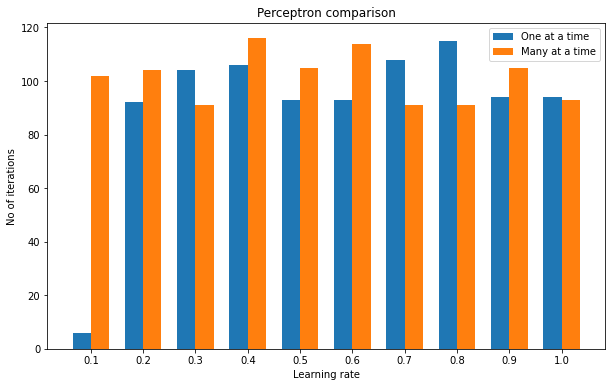

In [ ]:
labels = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']
x = np.arange(len(labels)) 
width = 0.35  
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.bar(x - width/2, one_time_iter, width, label='One at a time')
ax.bar(x + width/2, many_time_iter, width, label='Many at a time')

ax.set_xlabel('Learning rate')
ax.set_ylabel('No of iterations')
ax.set_title('Perceptron comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### Initial weight all zeros

In [ ]:
one_time_iter = []
one_time_weight = []
many_time_iter = []
many_time_weight = []
lr = np.arange(0.1,1.1,0.1)
w2 = np.zeros(6)
for i in lr:
  w_m,iter_m = many_at_a_time(i,w2)
  many_time_iter.append(iter_m)
  many_time_weight.append(w_m)
  
  w_o,iter_o = one_at_a_time(i,w2)
  one_time_iter.append(iter_o)
  one_time_weight.append(w_o)

print('MANY TIME Iteration:', many_time_iter)
print('MANY TIME WEIGHT: ', many_time_weight)
print('ONE TIME Iteration:', one_time_iter)
print('ONE TIME WEIGHT: ', one_time_weight)

MANY TIME Iteration: [105, 105, 92, 105, 92, 105, 105, 105, 105, 92]
MANY TIME WEIGHT:  [array([ 6.5  , -4.425,  2.8  , -0.5  , -5.45 ,  1.2  ]), array([ 13.  ,  -8.85,   5.6 ,  -1.  , -10.9 ,   2.4 ]), array([ 18.   , -11.625,   7.5  ,  -1.2  , -15.45 ,   3.   ]), array([ 26. , -17.7,  11.2,  -2. , -21.8,   4.8]), array([ 30.   , -19.375,  12.5  ,  -2.   , -25.75 ,   5.   ]), array([ 39.  , -26.55,  16.8 ,  -3.  , -32.7 ,   7.2 ]), array([ 45.5  , -30.975,  19.6  ,  -3.5  , -38.15 ,   8.4  ]), array([ 52. , -35.4,  22.4,  -4. , -43.6,   9.6]), array([ 58.5  , -39.825,  25.2  ,  -4.5  , -49.05 ,  10.8  ]), array([ 60.  , -38.75,  25.  ,  -4.  , -51.5 ,  10.  ])]
ONE TIME Iteration: [94, 94, 94, 94, 94, 94, 94, 94, 94, 94]
ONE TIME WEIGHT:  [array([ 5.  , -3.35,  2.2 , -0.6 , -4.7 ,  1.6 ]), array([10. , -6.7,  4.4, -1.2, -9.4,  3.2]), array([ 15.  , -10.05,   6.6 ,  -1.8 , -14.1 ,   4.8 ]), array([ 20. , -13.4,   8.8,  -2.4, -18.8,   6.4]), array([ 25.  , -16.75,  11.  ,  -3.  , -23.5 

In [ ]:
data2 = {'Alpha(Learning Rate)':lr,
        'One at a time':one_time_iter,
        'Many at a time':many_time_iter}
 
df2 = pd.DataFrame(data2)
print('\t\t---Initial Weight all Zeros---')
print(df2)

		---Initial Weight all Zeros---
   Alpha(Learning Rate)  One at a time  Many at a time
0                   0.1             94             105
1                   0.2             94             105
2                   0.3             94              92
3                   0.4             94             105
4                   0.5             94              92
5                   0.6             94             105
6                   0.7             94             105
7                   0.8             94             105
8                   0.9             94             105
9                   1.0             94              92


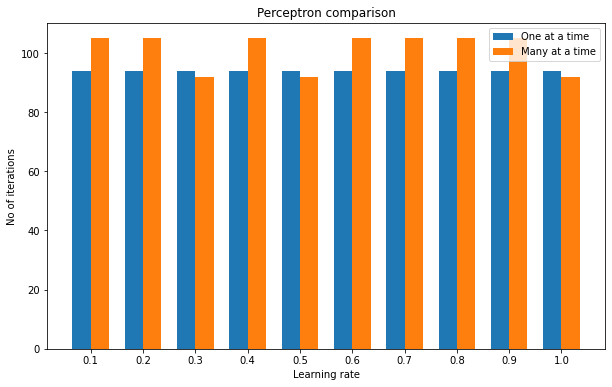

In [ ]:
labels = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.bar(x - width/2, one_time_iter, width, label='One at a time')
ax.bar(x + width/2, many_time_iter, width, label='Many at a time')

ax.set_xlabel('Learning rate')
ax.set_ylabel('No of iterations')
ax.set_title('Perceptron comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### Initial weight all randomly

In [ ]:
one_time_iter = []
one_time_weight = []
many_time_iter = []
many_time_weight = []
w3 = []
random.seed(10)
for i in range(0,6):
  n = random.randint(1,10)
  w3.append(n)
lr = np.arange(0.1,1.1,0.1)
for i in lr:
  w_m,iter_m = many_at_a_time(i,w3)
  many_time_iter.append(iter_m)
  many_time_weight.append(w_m)
  
  w_o,iter_o = one_at_a_time(i,w3)
  one_time_iter.append(iter_o)
  one_time_weight.append(w_o)

print('MANY TIME Iteration:', many_time_iter)
print('MANY TIME WEIGHT: ', many_time_weight)
print('ONE TIME Iteration:', one_time_iter)
print('ONE TIME WEIGHT: ', one_time_weight)

MANY TIME Iteration: [52, 37, 107, 106, 138, 13, 91, 128, 112, 110]
MANY TIME WEIGHT:  [array([ 9.5  , -7.375,  1.8  ,  2.3  , -1.25 , -3.1  ]), array([12.2 , -8.85,  3.  ,  1.4 , -3.9 , -3.8 ]), array([ 24.1  , -15.575,   7.6  ,  -0.7  , -14.45 ,  -0.8  ]), array([ 30. , -19.3,   9.8,  -0.8, -19.8,   0.6]), array([ 41.   , -26.125,  14.5  ,  -3.   , -29.75 ,   3.5  ]), array([ 16.6, -12.2,   5.2,   3.8,  -8. ,  -3.8]), array([ 47.8  , -31.375,  17.5  ,  -1.8  , -34.45 ,   2.4  ]), array([ 61.2, -40. ,  22.2,  -3.2, -46.4,   8.2]), array([ 64.  , -41.75,  23.2 ,  -2.8 , -48.5 ,   8.2 ]), array([ 70. , -46.5,  27. ,  -4. , -53. ,   9. ])]
ONE TIME Iteration: [44, 97, 15, 105, 86, 88, 7, 108, 94, 6]
ONE TIME WEIGHT:  [array([ 9.5  , -7.375,  1.8  ,  2.3  , -1.25 , -3.1  ]), array([ 16.6 , -11.35,   4.6 ,   0.2 ,  -8.7 ,  -1.2 ]), array([10.  , -7.85,  2.2 ,  2.6 , -1.7 , -3.2 ]), array([ 27.6, -18.5,   9. ,  -0.8, -19. ,   3. ]), array([ 29.5, -19.5,  10.5,  -1.5, -21. ,   2.5]), array([

In [ ]:
data3 = {'Alpha(Learning Rate)':lr,
        'One at a time':one_time_iter,
        'Many at a time':many_time_iter}
 
df3 = pd.DataFrame(data3)
print('\t\t---Initial Weight all random values---')
print(df3)

		---Initial Weight all random values---
   Alpha(Learning Rate)  One at a time  Many at a time
0                   0.1             44              52
1                   0.2             97              37
2                   0.3             15             107
3                   0.4            105             106
4                   0.5             86             138
5                   0.6             88              13
6                   0.7              7              91
7                   0.8            108             128
8                   0.9             94             112
9                   1.0              6             110


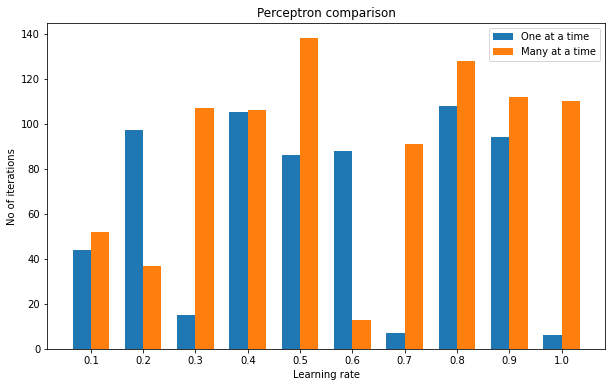

In [ ]:
labels = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.bar(x - width/2, one_time_iter, width, label='One at a time')
ax.bar(x + width/2, many_time_iter, width, label='Many at a time')

ax.set_xlabel('Learning rate')
ax.set_ylabel('No of iterations')
ax.set_title('Perceptron comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()